In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2
%matplotlib inline

In [25]:
# ===============================
# 2. Set Paths
# ===============================
ATTR_CSV = r'D:\Shiva\Shiva New\Shiva New Project\list_attr_celeba.csv'
IMG_FOLDER = r'D:\Shiva\Shiva New\Shiva New Project\img_align_celeba\img_align_celeba'
PARTITION_CSV = r'D:\Shiva\Shiva New\Shiva New Project\list_eval_partition.csv'

In [27]:
# ===============================
# 3. Load Attribute Data
# ===============================
df_attr = pd.read_csv(ATTR_CSV)
df_attr.set_index('image_id', inplace=True)

In [29]:
# Convert -1 to 0 for binary classification
df_attr = (df_attr + 1) // 2

In [31]:
# Display basic info
print("Shape:", df_attr.shape)
print("Columns:", df_attr.columns.tolist())
display(df_attr.head())

Shape: (202599, 40)
Columns: ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [33]:
# ===============================
# 4. Load Partition Information
# ===============================
df_partition = pd.read_csv(PARTITION_CSV)
df_partition.columns = ['image_id', 'partition']
df_partition.set_index('image_id', inplace=True)
display(df_partition['partition'].value_counts())

partition
0    162770
2     19962
1     19867
Name: count, dtype: int64

In [35]:
# ===============================
# 5. Merge for Easier Management
# ===============================
df = df_attr.merge(df_partition, left_index=True, right_index=True)
display(df.head())

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


<Figure size 1500x500 with 0 Axes>

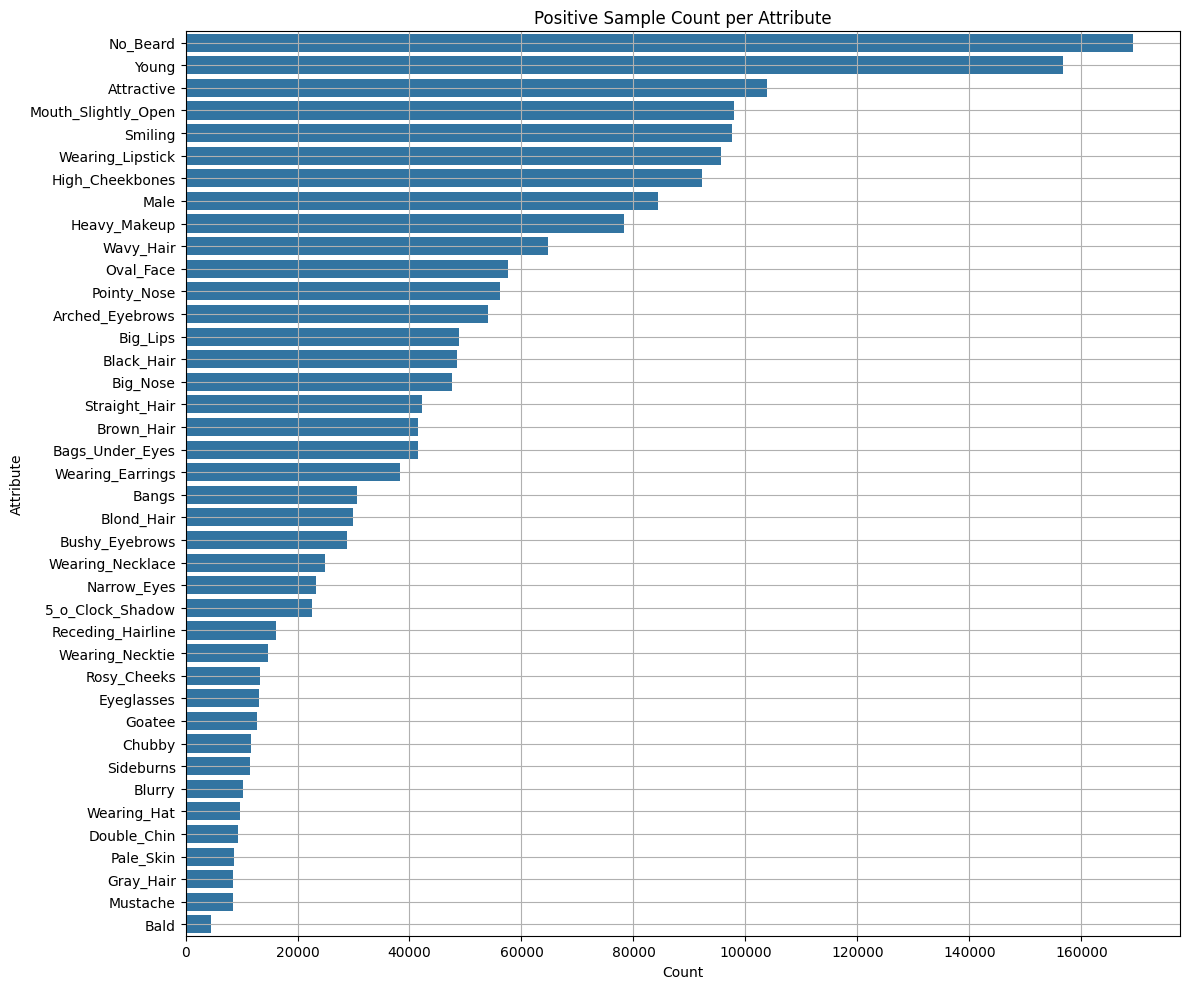

In [37]:
# ===============================
# 6. Class Distribution for Each Attribute
# ===============================
attr_counts = df.iloc[:, :-1].sum().sort_values(ascending=False)

# Plot distribution
plt.figure(figsize=(12, 10))
sns.barplot(x=attr_counts.values, y=attr_counts.index)
plt.title('Positive Sample Count per Attribute')
plt.xlabel('Count')
plt.ylabel('Attribute')
plt.grid(True)
plt.tight_layout()
plt.show()

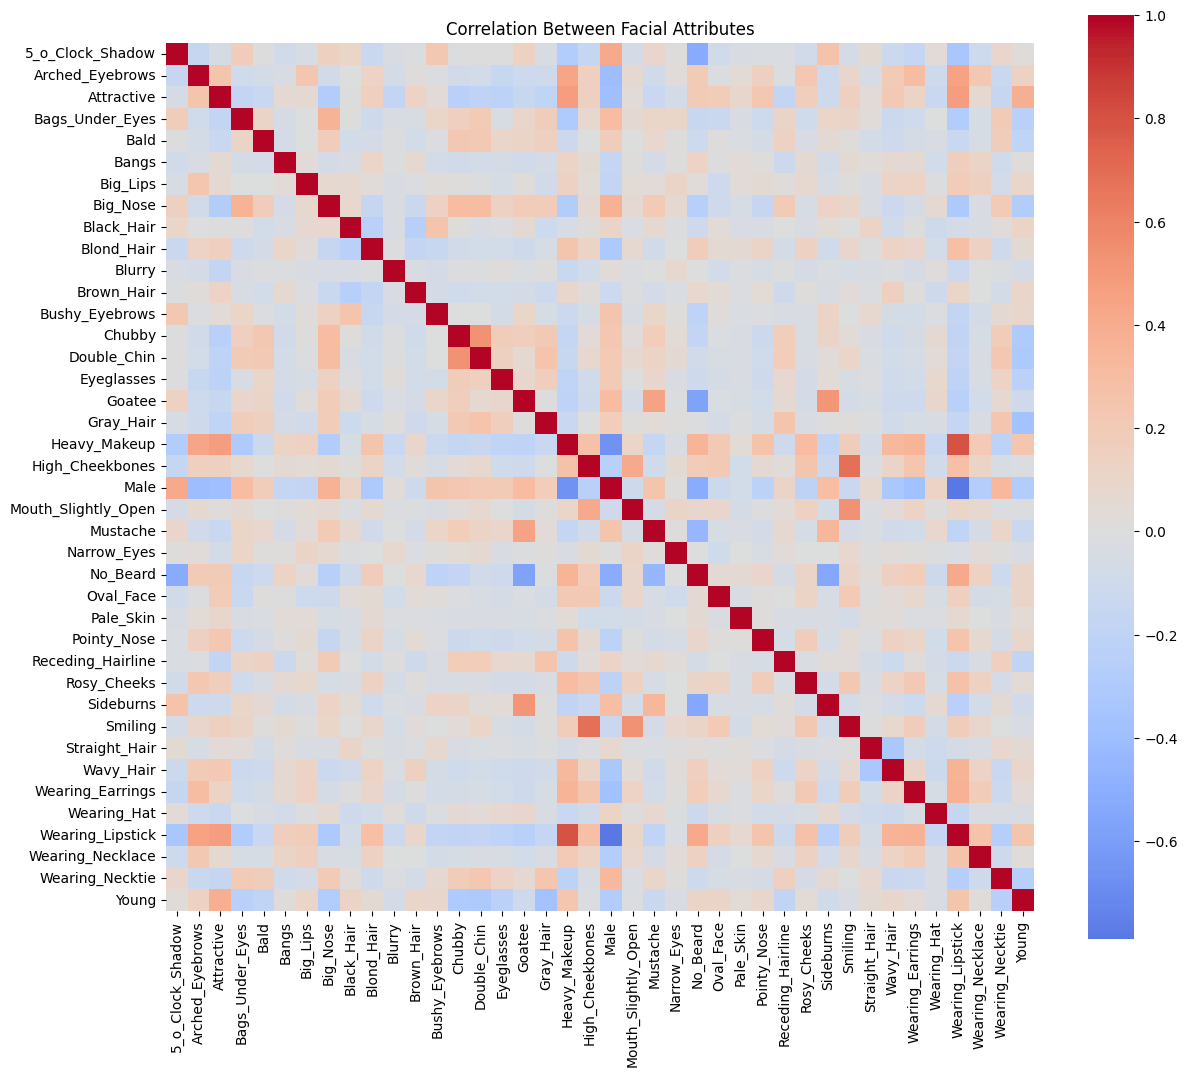

In [39]:
# ===============================
# 7. Attribute Correlation Matrix
# ===============================
plt.figure(figsize=(14, 12))
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True)
plt.title("Correlation Between Facial Attributes")
plt.show()

In [40]:
# ===============================
# 8. Example Images with Attributes
# ===============================
def show_images_with_attributes(attr, count=5):
    sample = df[df[attr] == 1].sample(count)
    plt.figure(figsize=(15, 5))
    for i, img_id in enumerate(sample.index):
        img_path = os.path.join(IMG_FOLDER, img_id)
        img = Image.open(img_path)
        plt.subplot(1, count, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_id)
    plt.suptitle(f"Sample Images with Attribute: {attr}")
    plt.show()

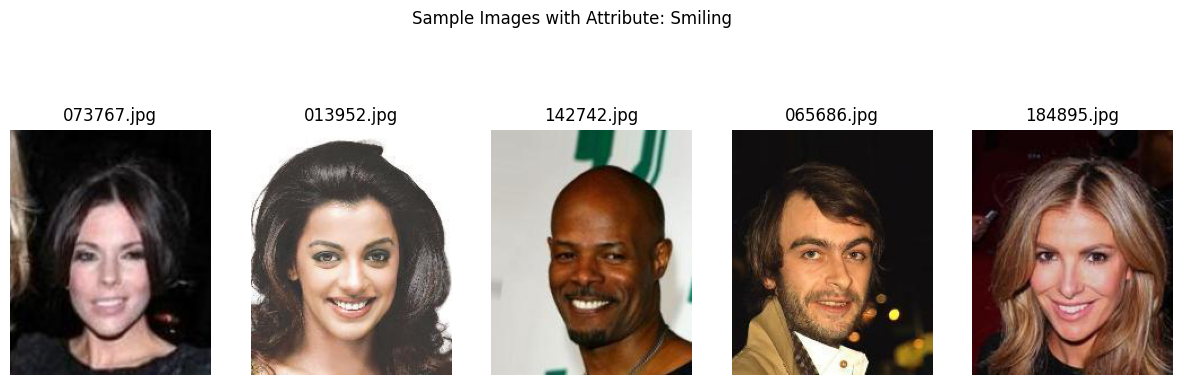

In [43]:
# Example: show images with 'Smiling'
show_images_with_attributes('Smiling')

In [45]:
# ===============================
# 9. Preprocessing: Image Resizing & Normalization
# ===============================
def preprocess_image(image_path, size=(128, 128)):
    img = Image.open(image_path)
    img = img.resize(size)
    img = np.array(img) / 255.0  # Normalize to [0, 1]
    return img

In [47]:
# Example usage:
sample_image_path = os.path.join(IMG_FOLDER, df.index[0])
img_array = preprocess_image(sample_image_path)
print("Preprocessed image shape:", img_array.shape)

Preprocessed image shape: (128, 128, 3)
